<a href="https://colab.research.google.com/github/michalszczecinski/data-driven-notebooks/blob/master/electronics/analog_electronics_project_2_heart_pulse_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Imports {display-mode: "form"}
import os
import sys
import platform
import math
import datetime

import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

from collections import OrderedDict

# print versions
print (f"system: {sys.version}")
print (f"pandas: {pd.__version__}")
print (f"numpy: {np.__version__}")

system: 3.7.11 (default, Jul  3 2021, 18:01:19) 
[GCC 7.5.0]
pandas: 1.1.5
numpy: 1.19.5


In [ ]:
# @title Display settings  {display-mode: "form"} 
sns.set(context='notebook', style="whitegrid", rc={"figure.figsize": (20, 10)})
pd.set_option("display.float_format", '{:.3f}'.format)
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)
pd.set_option("max_colwidth", 200)

In [ ]:
# @title Helper functions {display-mode: "form"} 
def generate_header(author='unknown', title='unknown', description ='unknown', prepared_for='unknown', tags=''):
    """
    desc: generates standard header with meta information describing report
    input: author, title, description, prepared_for, tags
    output: rendering formatted dataframe with report details
    """
    meta_dict = OrderedDict()

    # properties to fill
    meta_dict['author'] = author
    meta_dict['title'] = title
    meta_dict['description'] = description
    meta_dict['prepared_for'] = prepared_for
    meta_dict['tags'] = str(tags)

    # auto generated
    runtime = datetime.datetime
    meta_dict['runtime'] = runtime.now().strftime("%Y-%m-%d %H:%M:%S")
    path = os.getcwd()
    meta_dict['path'] = path
    python_version = platform.python_version()
    meta_dict['python_version'] = python_version
    meta_dict['pandas_version'] = pd.__version__

    df_meta= pd.DataFrame(meta_dict, index=['meta_information']).T
    return df_meta

def find_nearest(array,value):
    """
    Finds nearest value in the array to the one specified.
    Source: https://stackoverflow.com/questions/2566412/find-nearest-value-in-numpy-array
    """
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return array[idx-1]
    else:
        return array[idx]

def plot_metric_grid(df, columns=None):
  """
  Plots columns of the dataframe in separate grid rows.
  """
  if columns==None:
    cols= df.columns
  else:
    cols=columns
  fig,ax = plt.subplots(len(df[cols].columns),1 , sharex=True, figsize=(20,20))
  for i, col in enumerate(df[cols].columns):
    ax[i].set_title(col)
    ax[i].plot(df[col])
  plt.show();

<a name="cell-header"></a>
# Header: Title and metadata

In [ ]:
# setting up header info
author = 'Michal Szczecinski'
prepared_for ='Mechatronics class assignment.'
title = 'Assignment 2: Design of an optical heart pulse detector'
description = 'Enhance understanding of the design of complex circuits using simple building blocks such as op-amp amplifiers, filters and 555 timers.'
tags = ['#analog_electronics', '#electronics', '#engineering']
generate_header(author=author, title=title, description=description, prepared_for=prepared_for, tags=tags)

,meta_information
author,Michal Szczecinski
title,Assignment 2: Design of an optical heart pulse detector
description,"Enhance understanding of the design of complex circuits using simple building blocks such as op-amp amplifiers, filters and 555 timers."
prepared_for,Mechatronics class assignment.
tags,"['#analog_electronics', '#electronics', '#engineering']"
runtime,2021-08-10 16:19:56
path,/content
python_version,3.7.11
pandas_version,1.1.5


## Problem

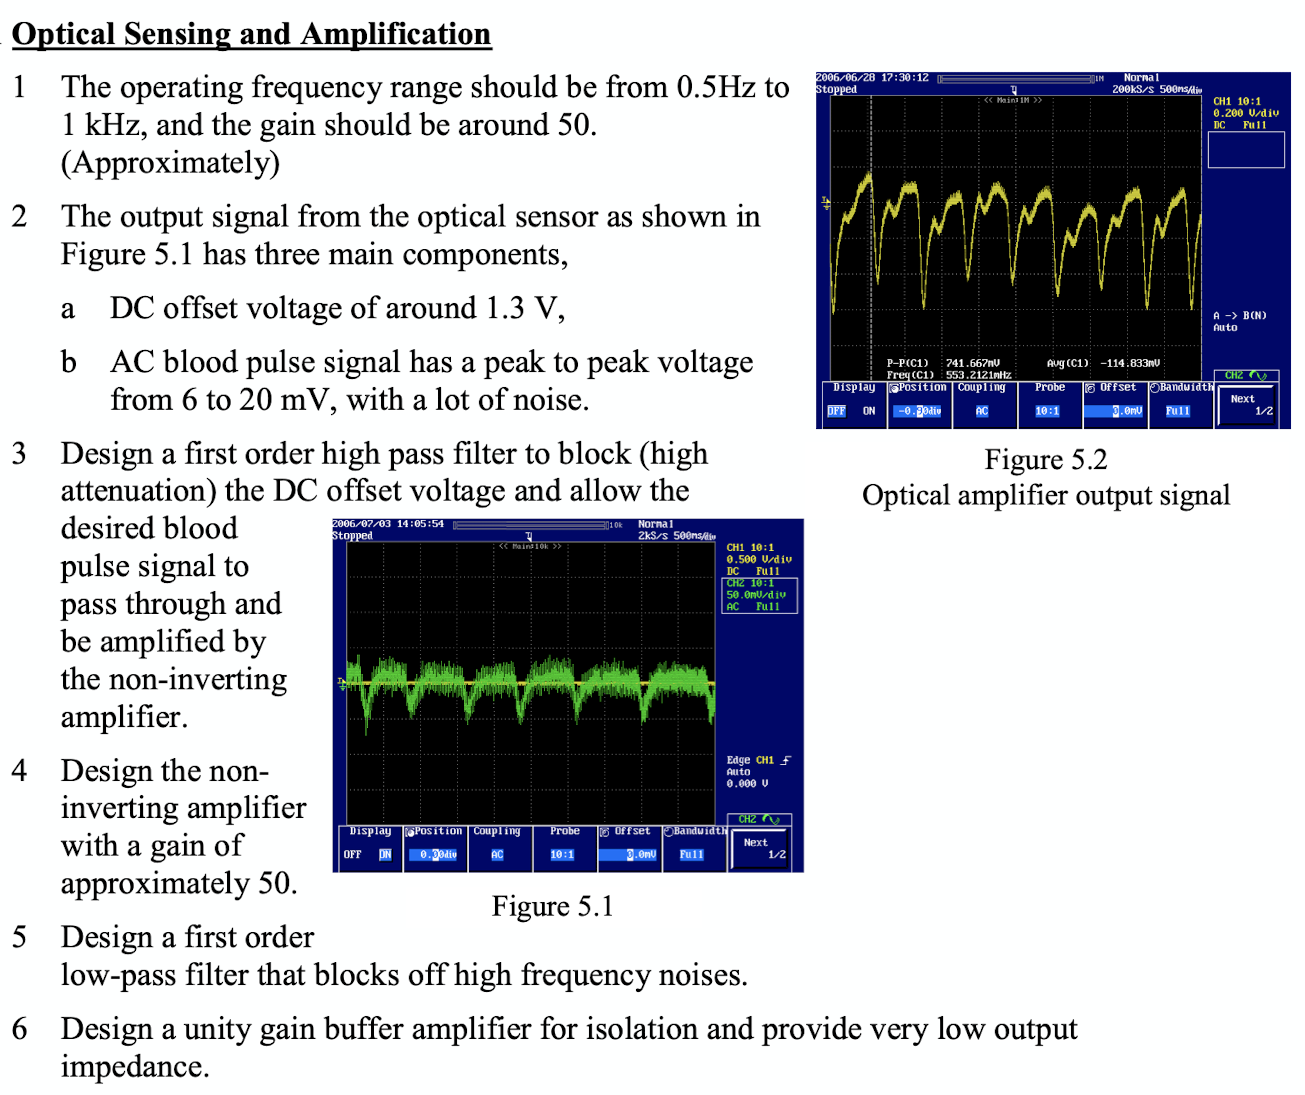

## Introduction

The objective of the circuit to be designed is to develop a part of the system measuring heart pulse. 



* We can measure heart rate by detecting and measuring blood flow through the blood vessels. The blood flow is caused by pumping action of the heart and it has a pulsating form.
* We can determine heart rate by measuring the rate of the blood pulses through our body using a light sensor. We usually choose the part of the body that is easier to measure like for example finger, wrist or ear in the context of used wavelengths of light by having short optical path lengths and being relatively translucent. Hemoglobin in the blood absorbs red light, therefore red light emitting diode (LED) is used to shine red light and our system detects the amount of the light being reflected by using light-sensitive photo diode.
* Our diode is very sensitive to noise so we have to use high gain amplifiers with filtering circuits in order to amplify and analyse the signal with the objective of minimising the error caused by the unwanted noise.
* In a real life scenario we would compare experimental data measured on a representative sample of subjects with data coming from devices including medical electrocardiogram (ECG).


### Block diagram

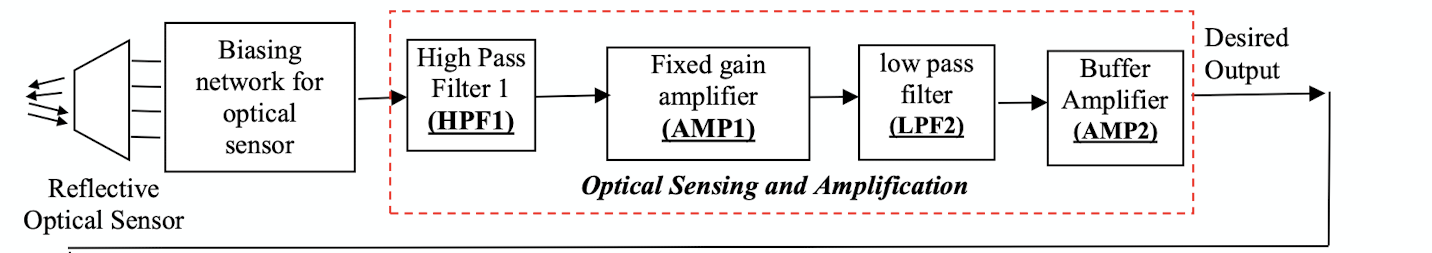

## Theory of heart rate measurement

#### How does detecting heart rate work?[5]

A pulse wave is the change in the volume of a blood vessel that occurs when the heart pumps blood, and a detector that monitors this volume change is called a pulse sensor.
First, there are four main ways to measure heart rate: electrocardiogram, photoelectric pulse wave, blood pressure measurement, and phonocardiography.
Pulse sensors use the photoelectric method.

Pulse sensors using the photoelectric pulse wave method are classified into 2 types depending on the measurement method: 

a) **Transmission** types measure pulse waves by emitting red or infrared light from the body surface and detecting the change in blood flow during heart beats as a change in the amount of light transmitted through the body.
This method is limited to areas where light can easily penetrate, such as the fingertip or earlobe.

b) **Reflection-Type Pulse Sensor** (Optical Sensor for Heart Rate Monitor)

Reflection-type pulse sensors (Optical Sensors for Heart Rate Monitor) emit infrared, red, or green light (~550nm) towards the body and measure the amount of light reflected using a photodiode or phototransistor. Oxygenated hemoglobin present in the blood of the arteries has the characteristic of absorbing incident light, so by sensing the blood flow rate (change in blood vessel volume) that changes following heart contractions over time we are able to measure the pulse wave signal.
Also, since reflected light is measured, the range of suitable areas is not limited as with transmission-type pulse sensors.

Pulse wave measurement using red or infrared light can be affected by infrared rays contained in sunlight (i.e. outdoors), preventing stable operation. For this reason, usage indoors or semi-indoors is recommended.
For pulse wave measurement outdoors (i.e. by smart watches), a green light source which has a high absorption rate in hemoglobin and less susceptibility to ambient light is preferred.

Figure: Four main ways to measure heart rate. [5]

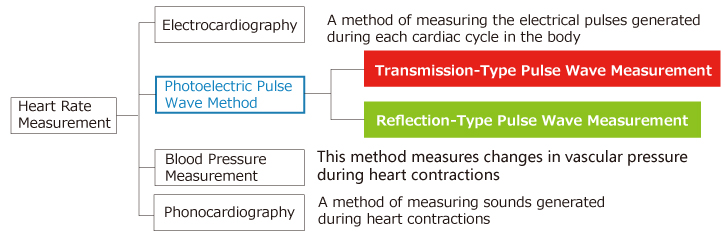

#### Red vs. Green: Does the Light Sensor in Your Wearable Matter? [6]

Wearable devices use either red or green lights to measure heart rate through a 150-year old process called **photoplethysmography** (PPG). PPG works in the following way: a LED light source shines onto the skin and light bounces back into the photodetector, recording how the light’s intensity changes as blood perfuses through the tissue. Data picked up by the photodetector use signal processing algorithms to convert the variations into a heart rate.

**Why is Green So Prevalent?**

Green light PPG sensors are used in the majority of optical heart rate monitor (OHRM) products for a few reasons: there is a vast amount of existing knowledge of the technology because of its common use, there is a great signal-to-noise ratio, and more resistance to motion artifacts.

Unfortunately, this convenience comes at a high price. Our skin absorbs green light from the light emitting diodes (LEDs) very well—this is problematic as it severely limits the amount of light that passes through the tissue and weakens the overall signal.

Skin tone, specifically the amount of melanin, affects the skin’s ability to absorb green light and further increases the variation in reporting accuracy. Finally, hemoglobin strongly absorbs green light, making it unable to reach the deeper tissue to extract any deeper physiological insights.

**What are advantages of a red light?**

Red light PPG sensors (also called pulse oximeters) utilize light in near-infrared spectroscopy (NIRS) and are widely used by doctors’ offices and hospitals, where accuracy is closely monitored and absolutely essential for medical use.

Our bodies do not absorb red light well which is actually a good thing; it allows the transmission to penetrate 10x deeper into multiple tissue layers in order to obtain a number of biometric signals (such as hydration, muscle saturation, total hemoglobin, and more) that a green light sensor can never see. Additionally, tattoos, freckles, and melanin in the skin do not affect readings by red light sensors.

Despite the massive benefits, red light PPG sensors have their development challenges, including a higher signal-to-noise ratio and susceptibility to motion artifacts. This creates a need for advanced and robust signal processing with the ability to filter out the noise (motion) in order to produce a high fidelity signal—not an easy task!

## Theory of analog electronics and design


### Operational Amplifier (Op-amp)

Op-amp is very widely used electronic devices. It is an IC that performs the operational amplification function like add,substract,multiply,filter, convert etc.


**Main features**

* very high open-loop gain, typical 100,000 to millions (1,000,000).
* high input resistance, typically 250k Ohm to 2M Ohm.
* low output resistance, typically 75 ohms for a 741 op-amp. 


**The golden rules**

Simplified rules for working out op-amp behaviour with external negative feedback:

1. The output attempts to do whatever is necessary to make the voltage difference between the inputs zero.
1. The inputs draw no current.[2]


#### High gain non-inverting amplifier (AMP1)

The input signal Vin is applied at the non-inverting terminal V+. The amplifier has negative feedback (the output is fed back to the inverting terminal V- through the feedback circuit formed by Rf and R1). 

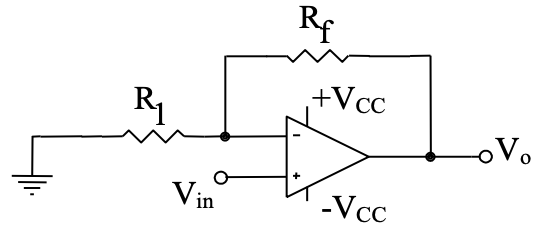

Closed-loop voltage gain of a non-inverting amplifier:

$$
A_f = \frac{V_o}{V_{in}}\\
A_f = 1 + \frac{R_f}{R_1}
$$

#### Buffer amplifier (AMP2)

A voltage buffer, also known as a voltage follower, or a unity gain amplifier, is an amplifier with a gain of 1. It’s one of the simplest possible op-amp circuits with closed-loop feedback.

Even though a gain of 1 doesn’t give any voltage amplification, a buffer is extremely useful because it prevents one stage’s input impedance from loading the prior stage’s output impedance, which causes undesirable loss of signal transfer.  [7]

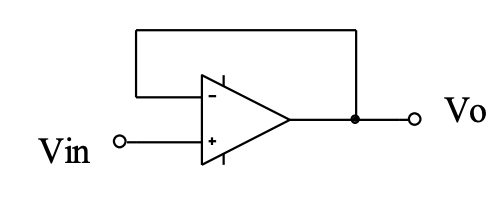

1. Rf=0 (short circuit) and R1 is open-circuited (assuming non-inverting op-amp)
2. Af=1 (unity closed-loop voltage gain)
3. The voltage follower drives external loads with a voltage that follows the input.
4. A voltage follower isolates a high resistance source from low resistance load. 


### Filters

A filter is a special network designed to pass or block signals falling within a specific band of frequencies. It allows us to specify which frequencies we want to let it through and which we want to remove.



Figure: Types of filters. [3]
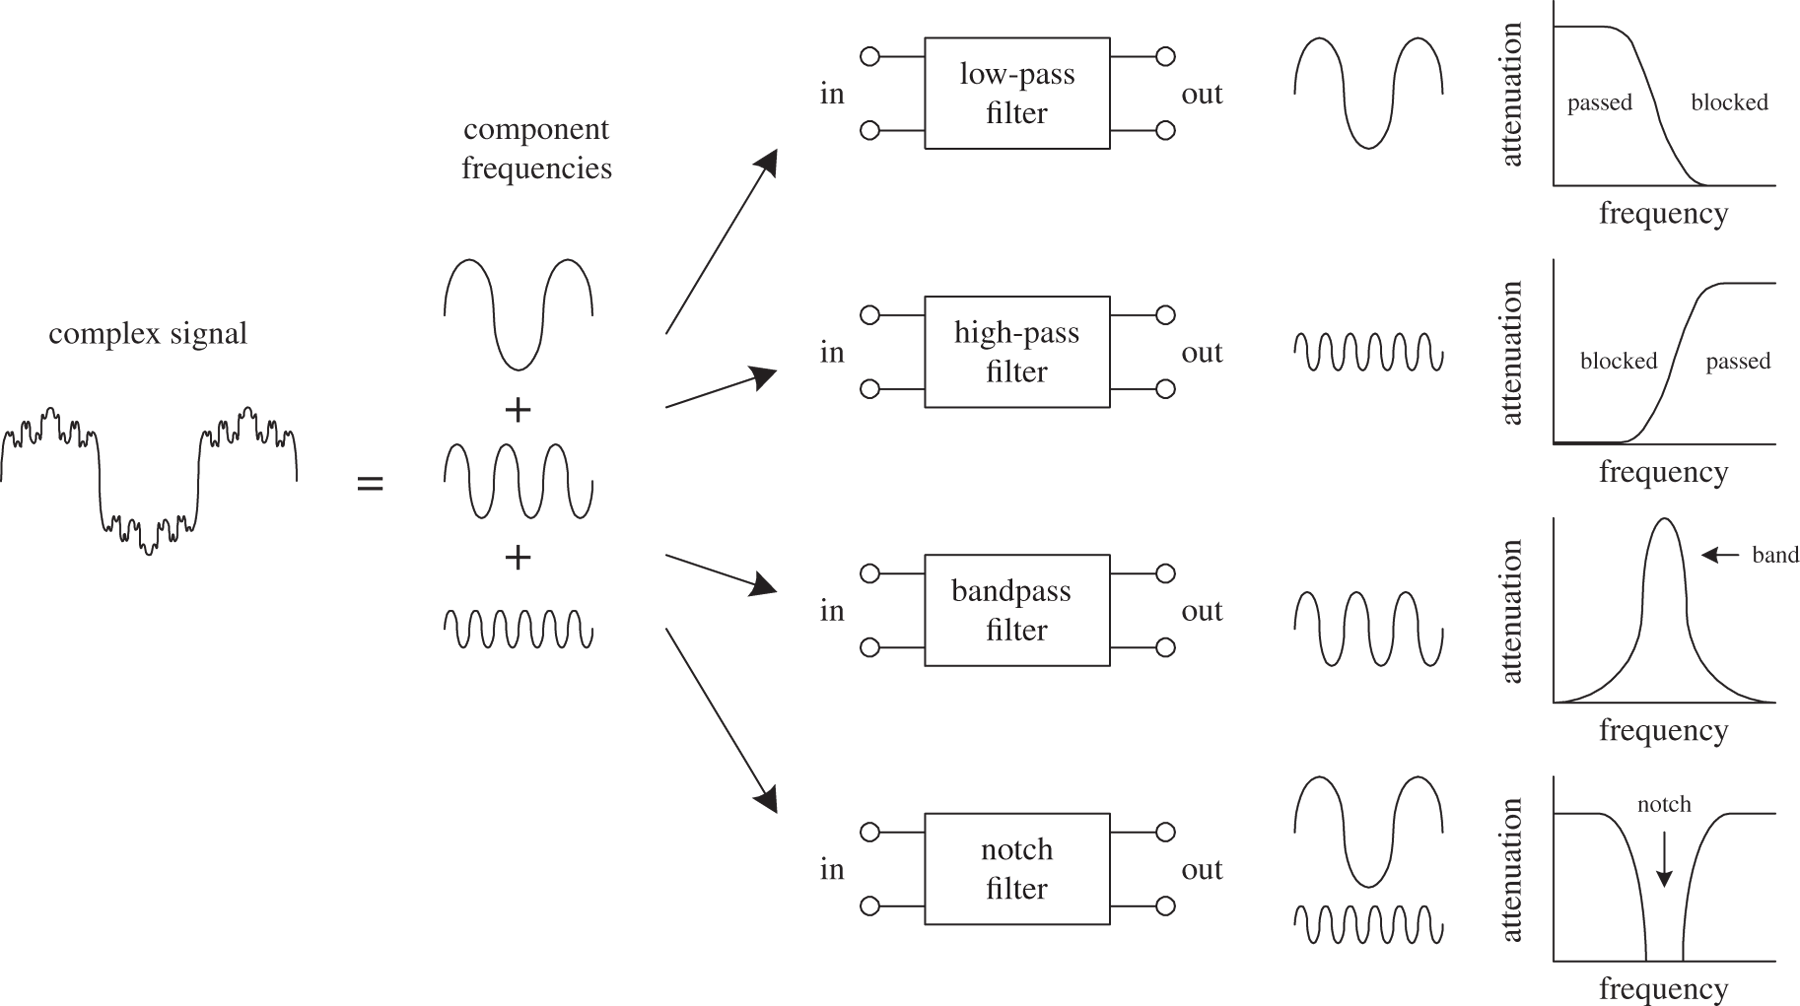

#### Passive filters

* Passive filter cmprises of only resistors , capacitors and inductors. They dont have additional power supply that would allow them to amplify the signal. So the maximum gain is 0 db. 


* Passive filters are designed using passive elements (e.g., resistors, capacitors, and inductors) and are most responsive to frequencies between around 100 Hz and 300 MHz. (The lower frequency limit results from the fact that at low frequencies the capacitance and inductance values become exceedingly large, meaning prohibitively large components are needed. The upper frequency limit results from the fact that at high frequencies parasitic capacitances and inductances wreak havoc.) When designing passive filters with very steep attenuation falloff responses, the number of inductor and capacitor sections increases. As more sections are added to get the desired response, greater is the chance for signal loss to occur. Also, source and load impedances must be taken into consideration when designing passive filters.

#### Active filters 

* An Active Filter uses active devices such as transistors or op-amps together with passive resistors, capacitors and inductors (passive filter components). The active devices can provide voltage gain of more than 1 and frequency selectivity.


* Active filters, unlike passive filters, are constructed from op amps, resistors, and capacitors—no inductors are needed. Active filters are capable of handling very low frequency signals (approaching 0 Hz), and they can provide voltage gain if needed (unlike passive filters). Active filters can be designed to offer comparable performance to LC filters, and they are typically easier to make, less finicky, and can be designed without the need for large-sized components. Also, with active filters, a desired input and output impedance can be provided that is independent of frequency. One major drawback with active filters is a relatively limited high-frequency range. Above around 100 kHz or so, active filters can become unreliable (a result of the op amp's bandwidth and slew-rate requirements). At radiofrequencies, it is best to use a passive filter.

Source: [3]	Practical Electronics for Inventors. 

#### First order high pass filter (HPF1)

* It is able to pass sinusoidal signals having frequencies above the cut-off frequency (fc).
* Rejects/attenuates sinusoidal signals having frequencies below fc.
* We allow it to pass higher frequencies and filter out low frequencies.
* A filter consists of a circuit with at least one reactive component (either a capacitor or inductor), typically used in conjunction with a resistor to form a voltage divider.  A filter with a single reactive component (one capacitor or one inductor), is called a first order filter.
* The difference from a low pass filter in the design is that for the high pass filter we have capacitor before resistor (resistor is closer to the Vout). 



Figure: First order RC high-pass filter.[2]
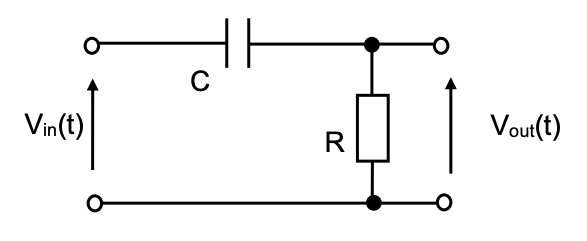

Cut-off frequency:

$$
f_c = \frac{1}{2 \pi RC}
$$

Phase shift at cut-off frequency:

$$
\theta(f_c) = 45^o
$$
The gain at cut-off frequency:
$$
A_v(f_c) = \frac{1}{\sqrt{2}} = 0.707 = -3 db
$$

Figure: Sketch of the magnitude and phase response of the 1st order RC high-pass passive filter.[2]
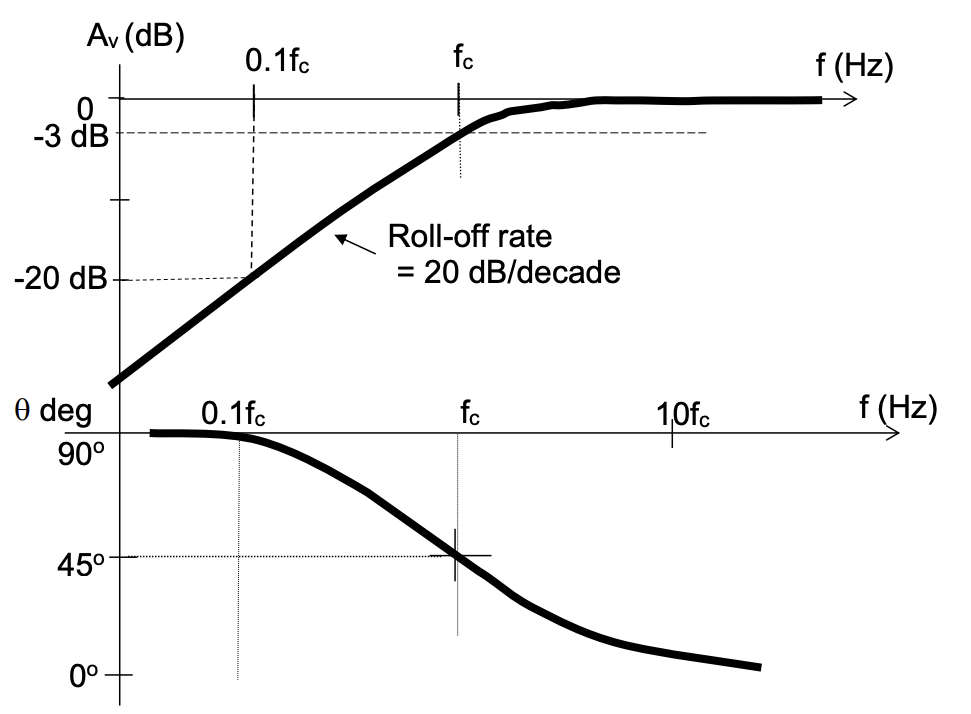

#### First order low pass filter (LPF2)

Figure: First order RC low-pass passive filter.[2]
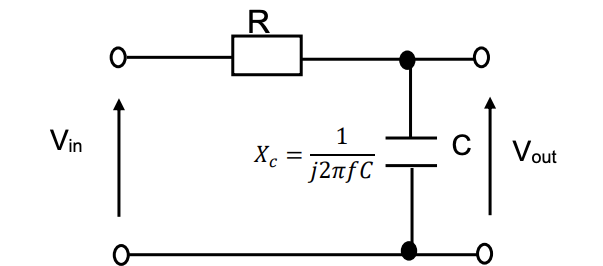

Cut-off frequency:

$$
f_c = \frac{1}{2 \pi RC}
$$

Phase shift at cut-off frequency:

$$
\theta(f_c) = -45^o
$$
The gain at cut-off frequency:
$$
A_v(f_c) = \frac{1}{\sqrt{2}} = 0.707 = -3 db
$$

Figure: Sketch of the magnitude and phase response of a 1st order RC low-pass passive filter. [2]

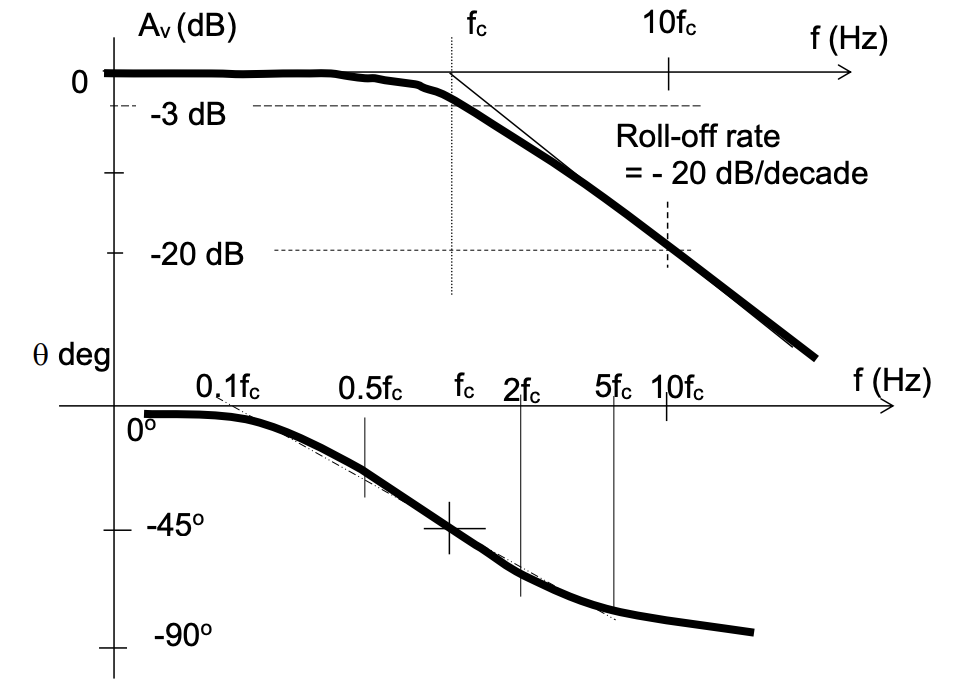

## Design approach

### Simulating sensor output data (for illustrative purposes only).

To visualize the importance of signal transformations we are going to create a very simple simulation of signal data. The main component of the signal is going to be a constant DC level. We also add some fluctuation using the sine function to mimic peaks in the pulse data. Finally we are going to add a small noise generated using a random function, sampling from the normal distribution.

In [ ]:
# setting random seed to generate same sequence of random numbers each time for reproducibility
np.random.seed(42)

no_values = 1000
base_level = 1.3

# simulate a simple sinusoidal function

# where values should be centered around
sin_base_level = 0
sin_range = 20 * 10**(-3) # peak to peak ac of 20 mV
sin_frequency_factor = 0.3

noise_centre = 0
noise_effect = 10**(-3)

#creating dataframe
index = list(range(no_values))
values = [base_level] * no_values

# values
df = pd.DataFrame(index=index, data=values, columns=['dc_level'])
df['x_sin'] = np.linspace(0,2000, len(index))
# df['x_sin'] = np.arange(0,2000, 0.1)
df['sin_fluctuations'] = (sin_range/2) * np.sin(df['x_sin'] * sin_frequency_factor) + sin_base_level


# adding random noise
df['noise'] = np.random.normal(loc=noise_centre, scale=noise_effect, size=no_values)
df['all_signal'] = df['dc_level'] + df['sin_fluctuations'] + df['noise']
df

,dc_level,x_sin,sin_fluctuations,noise,all_signal
0,1.300,0.000,0.000,0.000,1.300
1,1.300,2.002,0.006,-0.000,1.306
2,1.300,4.004,0.009,0.001,1.310
3,1.300,6.006,0.010,0.002,1.311
4,1.300,8.008,0.007,-0.000,1.307
...,...,...,...,...,...
995,1.300,1991.992,0.006,-0.000,1.306
996,1.300,1993.994,0.010,0.002,1.311
997,1.300,1995.996,0.009,0.001,1.310
998,1.300,1997.998,0.006,-0.001,1.305


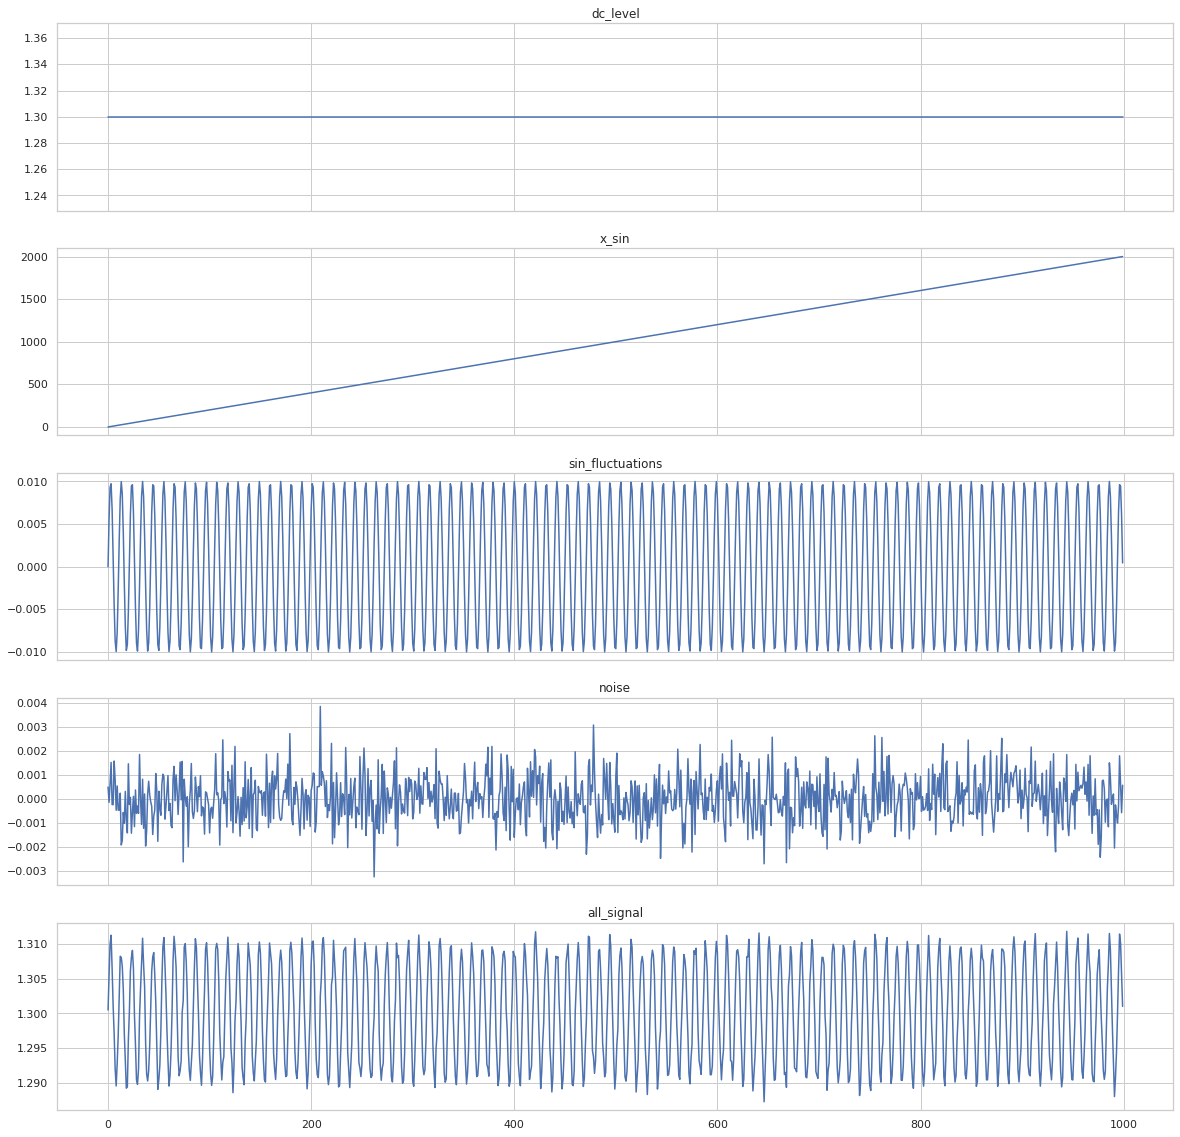

In [ ]:
plot_metric_grid(df)

From the plot below we can see that when we zoom out our signal is really hard to analyse, since it is dominated by the constant DC level and the fluctuations are very small and difficult to isolate. That is why we need to apply further transformations as shown in the next steps.

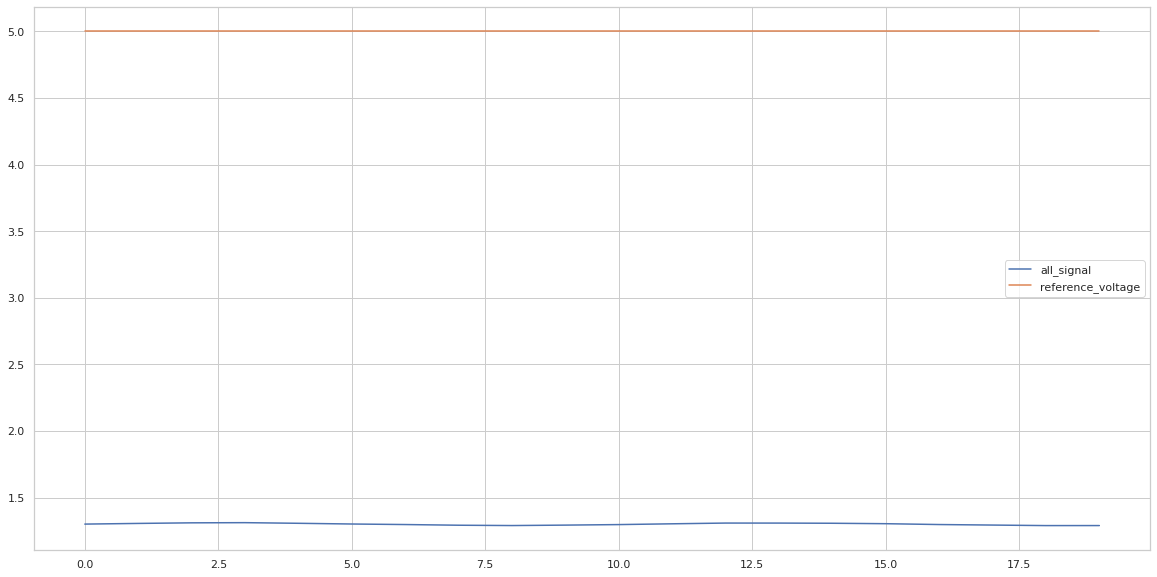

In [ ]:
# plotting data when zoomed out (compared to level of 5 V)
df['reference_voltage'] = 5
df[['all_signal', 'reference_voltage']][:20].plot()

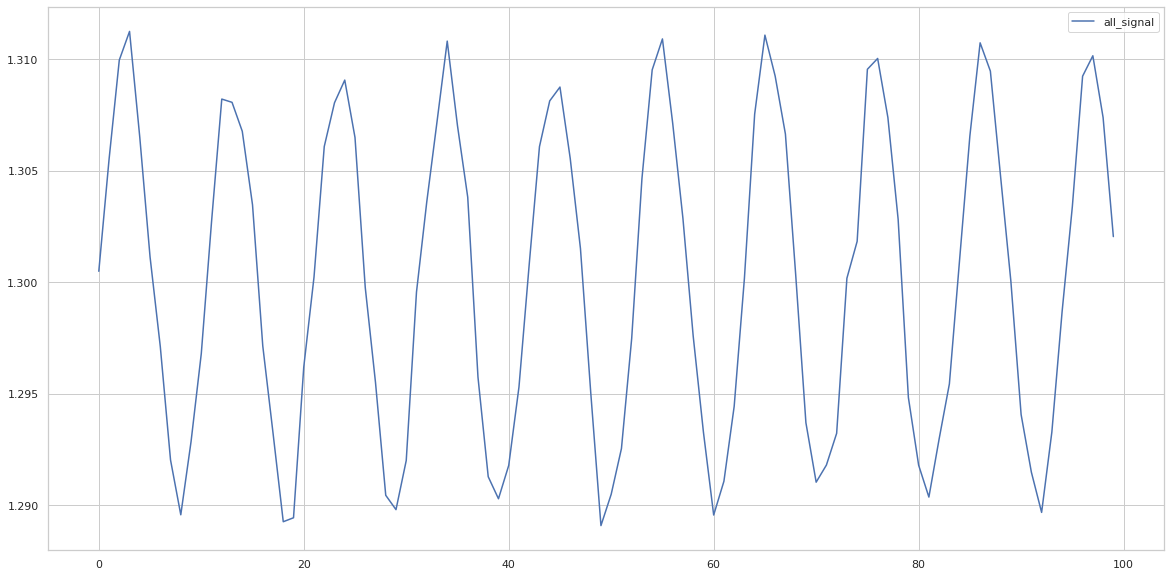

In [ ]:
# sampled data and zoomed
df[['all_signal']][:100].plot()

## Standard component values

### Get the values of resistors

1. We are automatically extracting standard resistor values from an online source.
2. Then we are populating a pandas dataframe with possible values extended to 5 orders of magnitude.
3. We use this dataframe and specially written Python function to find practical resistor values that are nearest to the theoretical values that we calculate as part of the system design.

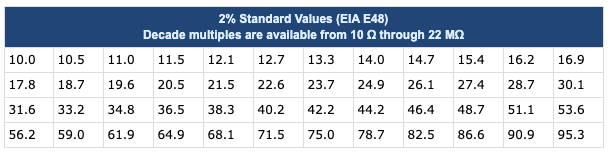

Figure 3: Resistor Values (2%)[Source: http://www.rfcafe.com/references/electrical/resistor-values.htm]

In [ ]:
# downloading resistor values from web table and saving as list
url  = "http://www.rfcafe.com/references/electrical/resistor-values.htm"
match = "2% Standard Values"
df_r = pd.read_html(url, match=match, header=0)
resistor_values = df_r[2].values.flatten()

#### Producing array of resitor values based on the desired order of magnitude

In [ ]:
resistor_values_all=[]
orders_of_magnitude=5
for x in range(orders_of_magnitude+1):
    added_resistor_values = resistor_values * 10**x
    resistor_values_all = np.append(resistor_values_all,added_resistor_values)

#### Most commonly available capacitor values

Source: https://www.rfcafe.com/references/electrical/capacitor-values.htm 
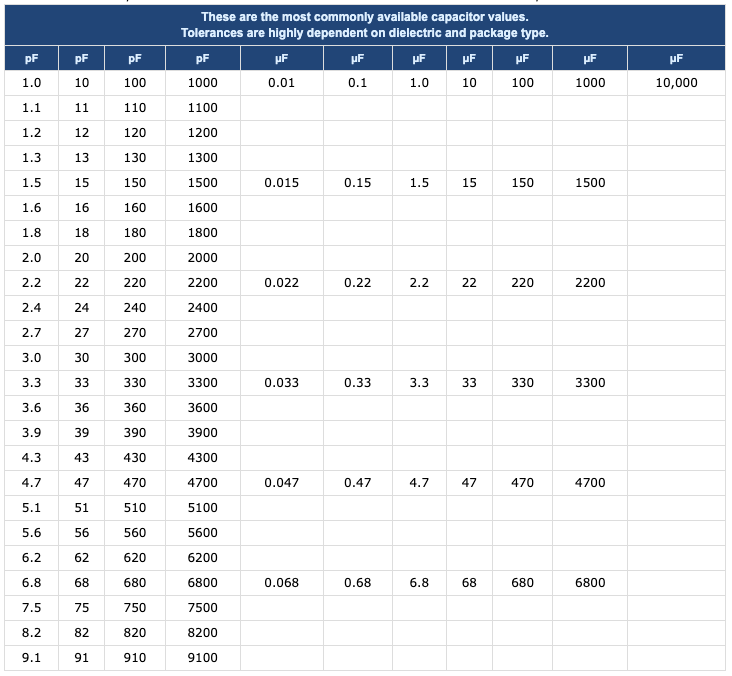

## Design of system blocks

### Removing DC level(High Pass filter, HPF1)
 
* DC offset voltage ~ 1.3 V
* There is going to be some light that is always reflected from the finger. On top of that there will be small fluctuations that correspond to changes in the blood flow, but that will be very small in comparison to the constant level.
* Consequently most of the signal is constant and a tiny part of the signal is changing with time.
* Therefore we need to subtract the constant level and also multiply the fluctuations so that we can see and analyse them.
* If we plot those components of the signal on the voltage vs frequency plot then the constant part of the signal would be about 0 hz signal and the fluctuations would be around the frequency of our heart beat, which is about 1-2 hz (1-2 beats per second).
* We can design the high pass filter that removes the ~0-1 hz frequency voltage and keeps our pulse.


In [ ]:
# setting desired cut off frequency
fc = 0.072
# choosing capacitor with standard value 22 uF
C = 22 * 10**(-6)
# calculating R by transforming formula fc = 1/(2*pi*R*C)
R = 1/(2 * fc * math.pi * C)
R

100476.60548730768

In [ ]:
HPF1_R_practical = find_nearest(resistor_values_all, R)
HPF1_R_practical

100000.0

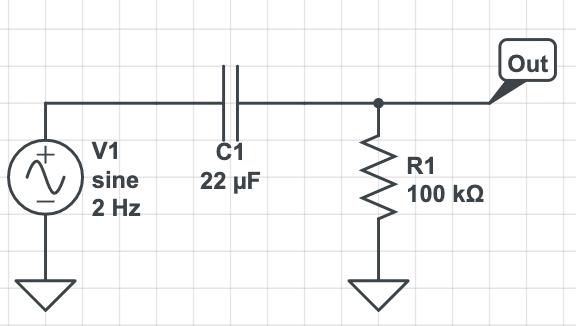

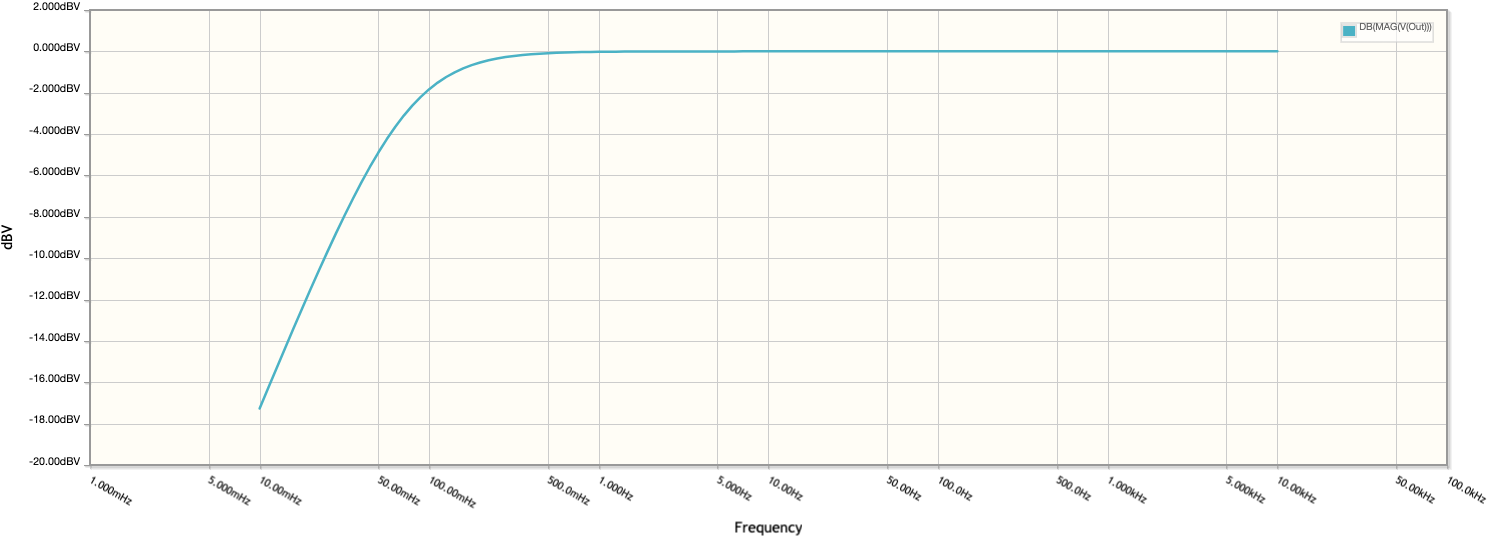

### Amplifying the AC blood pulse signal (AMP1)
 
* AC blood pulse signal has a peak to peak voltage from 6 to 20 mV, with a lot of noise.
* We built an Amplifier to make the signal bigger.
* We are going to use a non-inverting amplifier.
* Expected gain is approximately 50.



In [ ]:
# calculating values of resistors to achieve gain of 50
Av = 50
# we choose a standard value of R1 resistor and use it to calculate Rf
R1 = 10000
Rf = (Av-1) * R1
Rf

490000

In [ ]:
# fiding nearest resistor value to theoretical value calculated above
Rf_practical = find_nearest(resistor_values_all, Rf)
Rf_practical

487000.0

In [ ]:
# calculating real gain due to availability of standard value components
gain_practical = (1+Rf_practical/R1)
gain_practical

49.7

### Gain simulation view

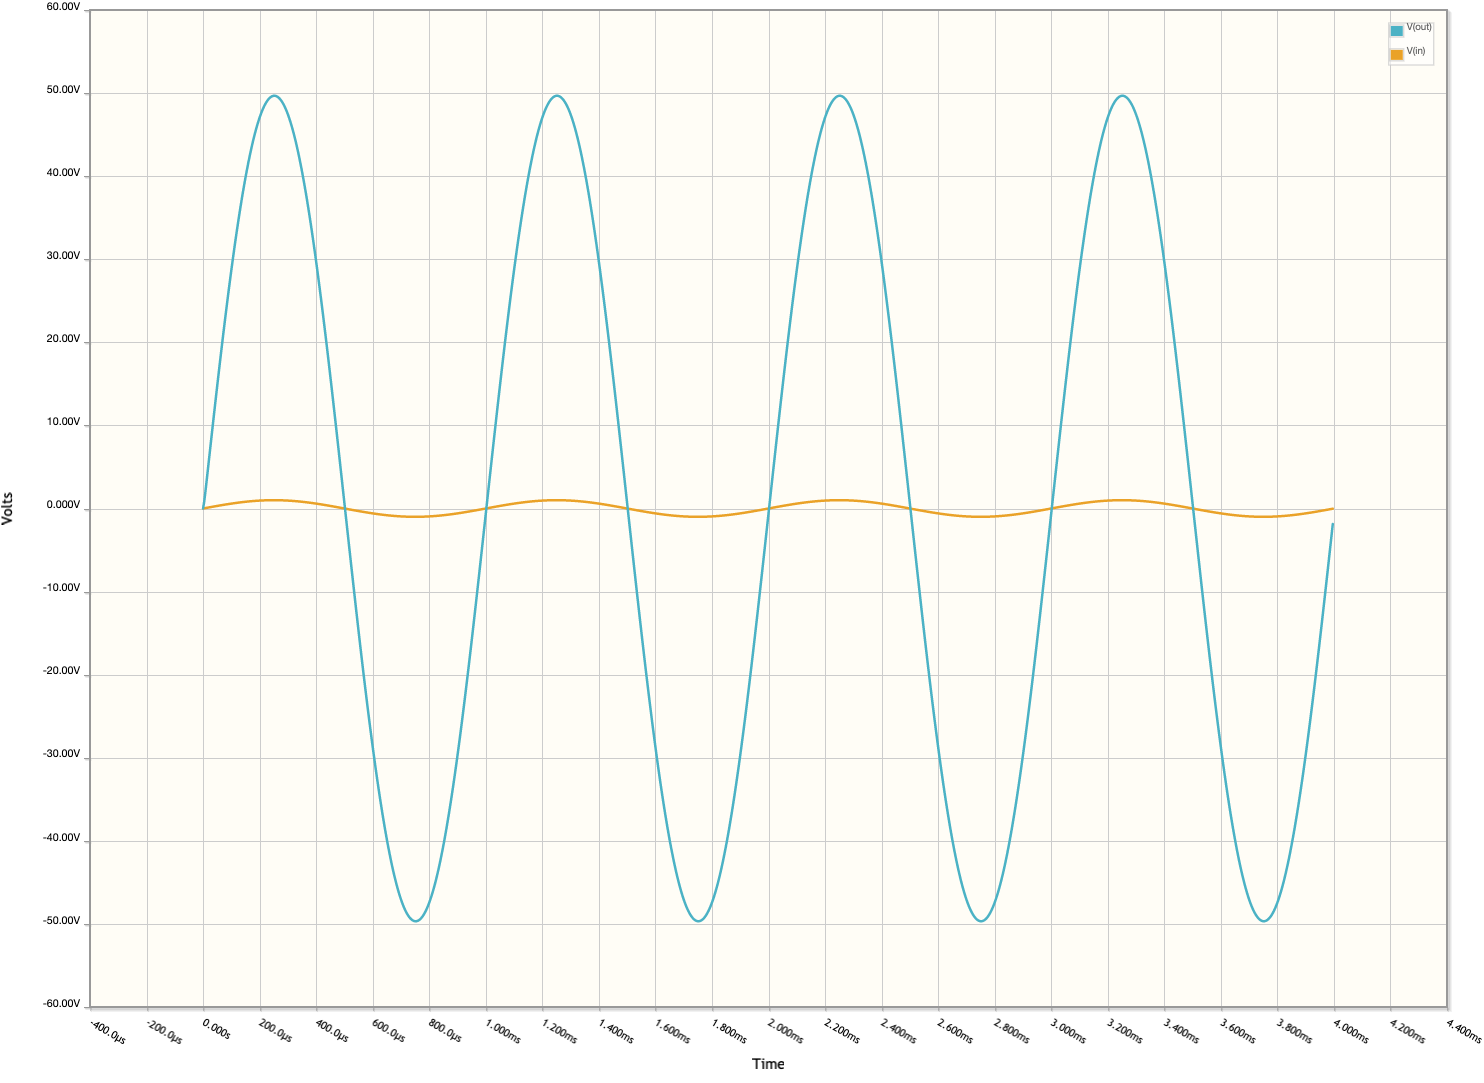

### Removing high frequency noise (Low Pass Filter, LPF2)

* A first order low pass filter (LPF2) should be used to limit the band-width and eliminate high frequency noises. 
* **What should we consider high frequency?**

    "The theoretical maximum heart rate of a human is 300bpm, however there have been multiple cases where this theoretical upper limit has been exceeded. The fastest human ventricular conduction rate recorded to this day is a conducted tachyarrhythmia with ventricular rate of 480 beats per minute,[27] which is comparable to the heart rate of a mouse."
* Based on that we will assume that our heart beat when measured will not exceed 300 bpm, that means 5 beats per second (300/60s).



In [ ]:
max_bpm = 300
frequency = max_bpm/60
period = 1/frequency
print(frequency)
print(period)

5.0
0.2


Based on our calculations we can assume frequency of signal should never go above 5, so lets filter any value above 5 out.

In [ ]:
# setting desired cut off frequency
fc = 5
# choosing capacitor with standard value 22 uF
C = 22 * 10**(-6)
# calculating R by transforming formula fc = 1/(2*pi*R*C)
R = 1/(2 * fc * math.pi * C)
R

1446.8631190172302

In [ ]:
LPF2_R_practical = find_nearest(resistor_values_all, R)
LPF2_R_practical

1470.0

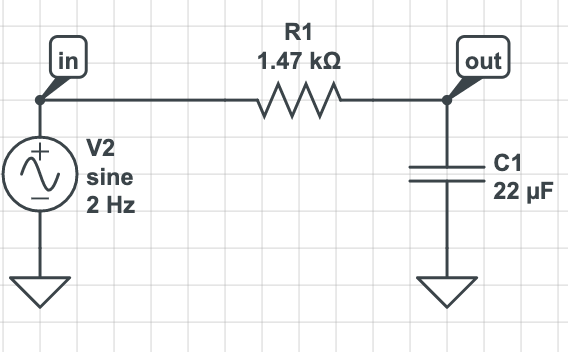

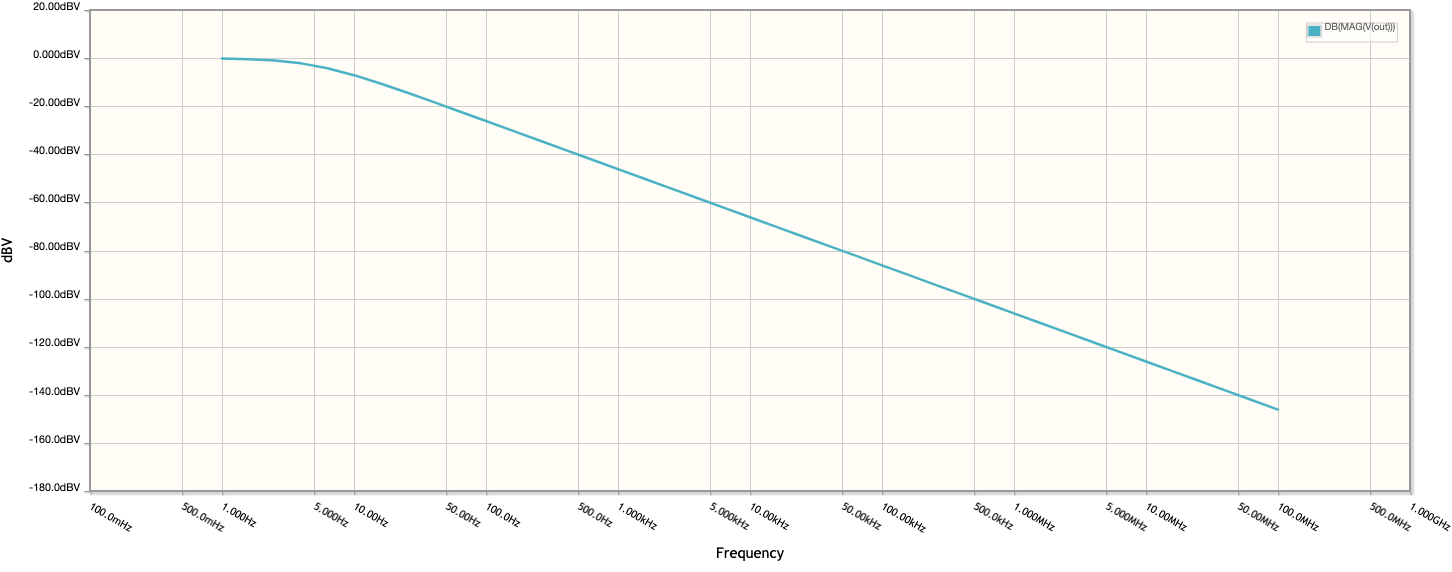

#### (BONUS) Finding the peaks in pulse data
 
* We can find peaks by looking at the slope of the data between points. For example we could download our transformed signal into CSV and to the analysis by looping through each point and finding locations where the slope has changed from negative to positive (to find the bottom peak), or locations where slope has changed from positive to negative (to find top peaks).
 
* If we have a theoretical function approximating our pulse we could calculate derivatives at given points.
 
* Since the purpose of the device is to measure our real heart rate (not approximation) then we would prefer using real empirical data to loop and compare pairs of adjacent points.
 
 
* Please note: this method might not be sufficient if there is noise in the data. Noise could introduce changing slopes so we could add some constraints such that we detect major peaks and not all the local peaks (for example  min time between the peaks , threshold level or do some additional filtering/smoothing).

## Overall Schematic Diagram

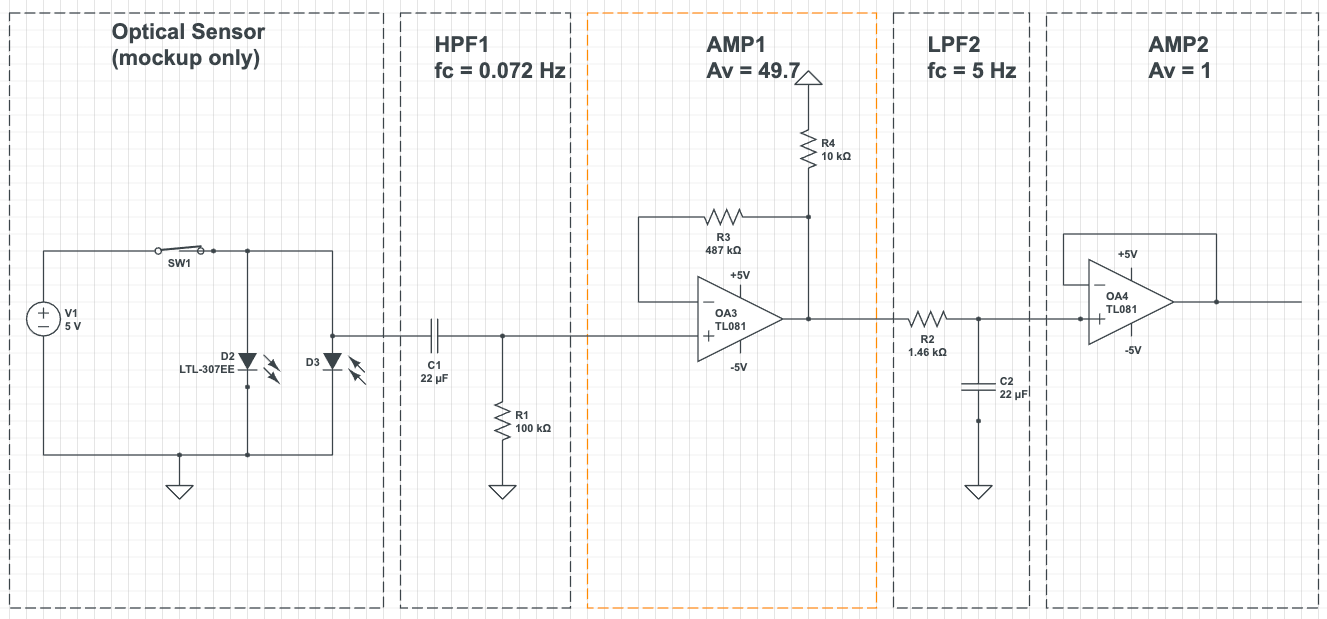

## Component list

| type                  | value     | count |
|-----------------------|-----------|-------|
| Operational Amplifier | TS462     | 2     |
| Capacitor              | 22 uF  | 2     |
| Resistor              | 1.46k Ohm | 1     |
| Resistor              | 10k Ohm | 1     |
| Resistor              | 100k Ohm | 1     |
| Resistor              | 487k Ohm | 1     |


### Data Sheet

Source: https://www.st.com/en/amplifiers-and-comparators/ts462.html
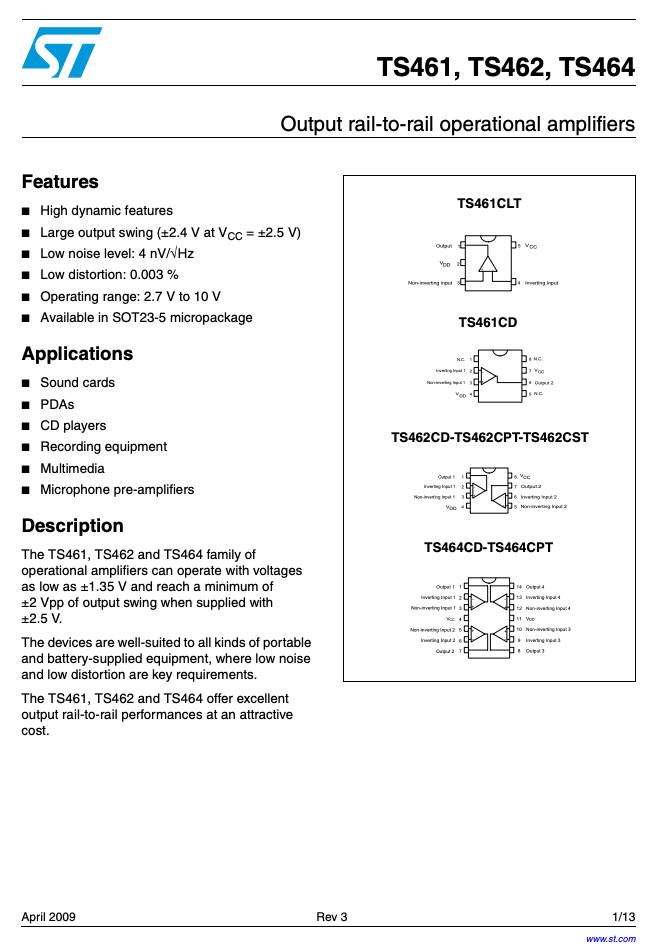

## Conclusion

* We have shown an example circuit design for an optical heart pulse detector that satisfies requirements specified in the Option 1:-Optical Sensing and Amplification.
* We have chosen a system design containing a combination of two filters (low pass and high pass) and two amplifiers (non-inverting and unity-gain buffer amplifiers).
* We have performed numerical optimization to find the resistor and capacitor components that minimise the error due to the selection of standard values of components.
* We have provided detailed background information about techniques used to measure heart rate pulse, including pros and cons for each method.
* We have provided theoretical background information about components used in analog electronics as well as calculation methods.
* We have included an overall schematic diagram as well as plots showing inputs and outputs of the sub-circuits.

Suggestion for improvements:

* In my reading I have come across information about passive filters being most suitable for frequencies between 100 and 300 hz, and active filters working better for the lower frequencies. In my original design I used passive filters for the purpose of simplicity and demonstrating knowledge separately for filters and amplifiers. However in practice it would be best to try to build the physical device using both types of filters and compare the performance.
* If we had the sample input signal then we could try to simulate the whole system and plot all corresponding waveforms.
* An idea for an interesting experiment would be to use different light wavelengths/sensors and measuring conditions to compare the results and choose the best approach.



## References

[1] Ngee Ann Polytechnic course notes: Analog Electronics and Applications, 'AEA Topic 1: Operational Amplifiers'.

[2] Ngee Ann Polytechnic course notes: Analog Electronics and Applications, 'AEA Topic 4: Passive Filter'.

[3] P. Scherz and S. Monk, Practical electronics for inventors. 2016.

[4]	P. Horowitz, The art of electronics, Third edition. New York, NY: Cambridge University Press, 2015.

[5] [What is a Pulse sensor?](https://www.rohm.com/electronics-basics/sensor/pulse-sensor)

[6] [Going red or green?](]https://biostrap.com/blog/going-red-or-green/)

[7] [Ultimate electronics](https://ultimateelectronicsbook.com/op-amp-voltage-buffer/)

[8] [Wikipedia: Heart rate](https://en.wikipedia.org/wiki/Heart_rate)

[9] [Youtube: Building Optical Pulse sensor](https://www.youtube.com/watch?v=-h3NZ3wVy0I).

[10] [Youtube: Viewing and analysing nScope csv data with python](https://www.youtube.com/watch?v=Jih-OYB0SyI).

In [ ]:
# @title Converting and exporting output {display-mode: "form"} 
# uncomment sections one at a time

# installs for converting to pdf
# !apt-get install texlive texlive-xetex texlive-latex-extra pandoc
# !pip install pypandoc

# # mount drive to access .ipynb file
# from google.colab import drive
# drive.mount('/content/drive')

# covert and export output 
!cp 'drive/My Drive/Colab Notebooks/analog_electronics_project_2_heart_pulse_detector.ipynb' ./
!jupyter nbconvert --to HTML "analog_electronics_project_2_heart_pulse_detector.ipynb"

[NbConvertApp] Converting notebook analog_electronics_project_2_heart_pulse_detector.ipynb to HTML
[NbConvertApp] Writing 3233986 bytes to analog_electronics_project_2_heart_pulse_detector.html
